In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.nunique

<bound method DataFrame.nunique of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  to

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Заменим пропущенные значения средними

In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

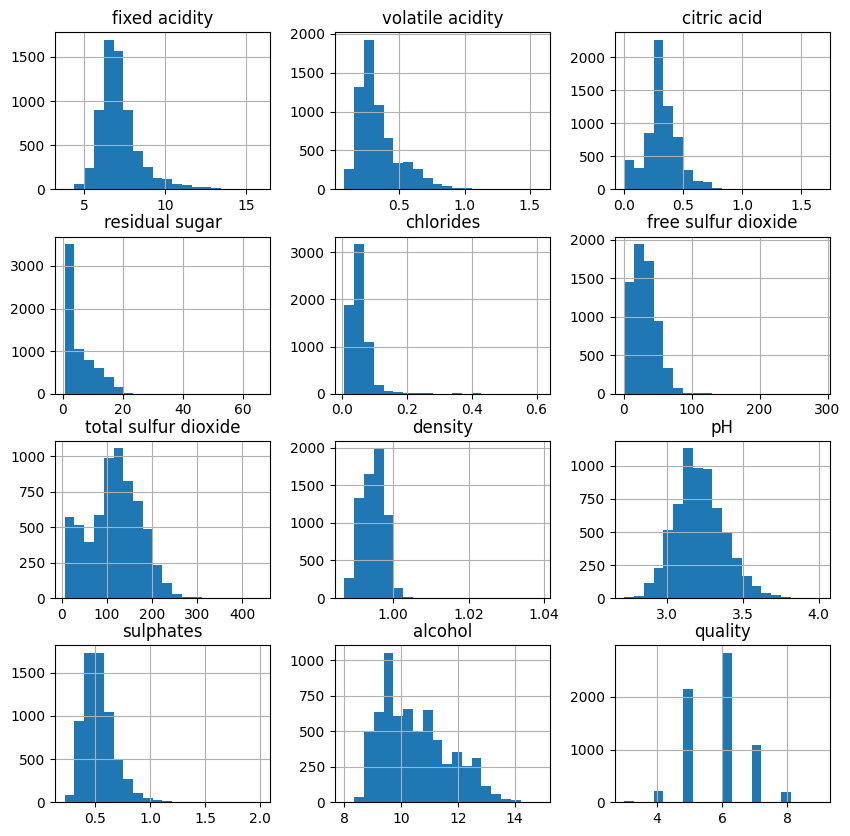

In [10]:
df.hist(bins=20,figsize=(10,10))
plt.show()

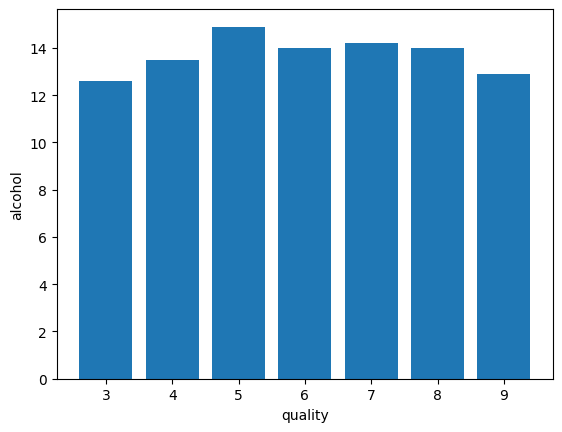

In [11]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

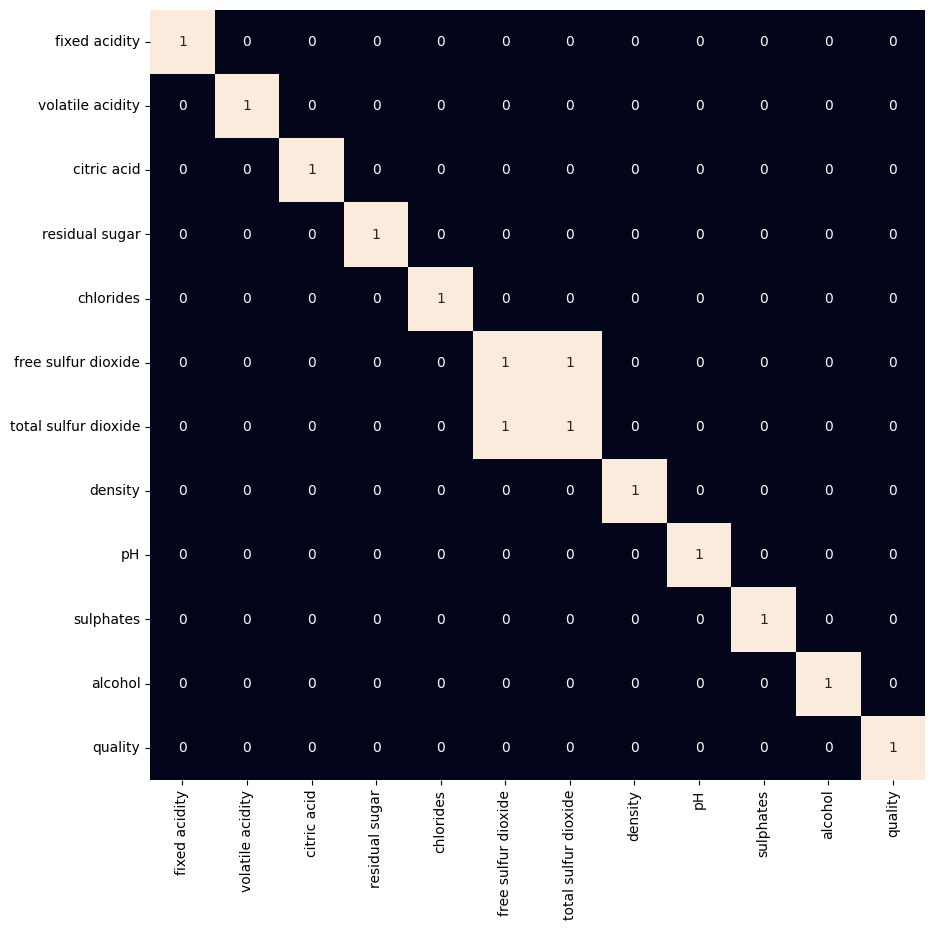

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [14]:
df = df.drop('total sulfur dioxide',axis = 1)

In [15]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [16]:
df['best quality'] = [1 if x>5 else 0 for x in df.quality]

In [17]:
df.replace({
    'white':1,
    'red':0
},inplace=True)

# train, test, split

In [18]:
features = df.drop(['quality','best quality'],axis=1)
target = df['best quality']
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state=40)

In [19]:
x_train.shape

(5197, 11)

In [20]:
x_test.shape

(1300, 11)

# Normalization

In [21]:
normalization = MinMaxScaler()
x_train = normalization.fit_transform(x_train)
x_test = normalization.fit_transform(x_test)

In [22]:
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report

# Модель

LogisticRegression()
Training Accuracy :  0.7019709565048414
Validation Accuracy :  0.6742319755621622
Confusion Matrix:
[[226 248]
 [106 720]]


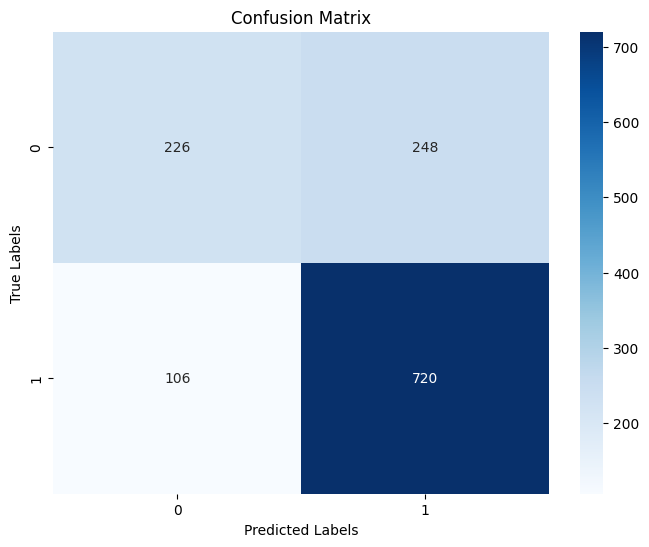

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       474
           1       0.74      0.87      0.80       826

    accuracy                           0.73      1300
   macro avg       0.71      0.67      0.68      1300
weighted avg       0.72      0.73      0.71      1300


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None

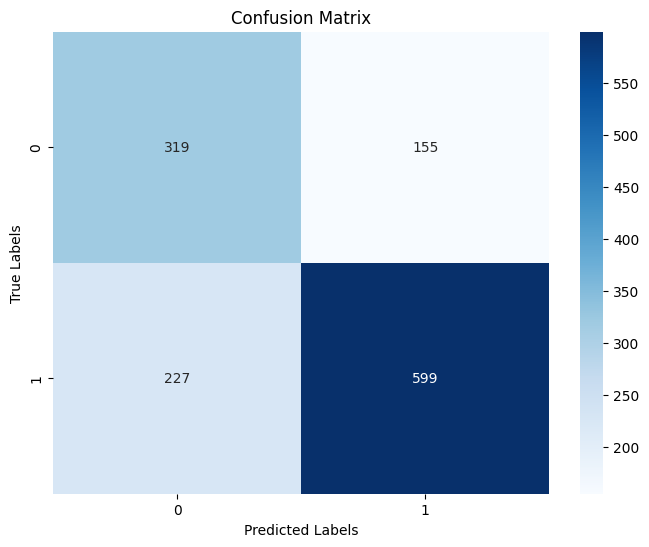

              precision    recall  f1-score   support

           0       0.58      0.67      0.63       474
           1       0.79      0.73      0.76       826

    accuracy                           0.71      1300
   macro avg       0.69      0.70      0.69      1300
weighted avg       0.72      0.71      0.71      1300


SVC()
Training Accuracy :  0.7069199304892986
Validation Accuracy :  0.7295951206056334
Confusion Matrix:
[[333 141]
 [201 625]]


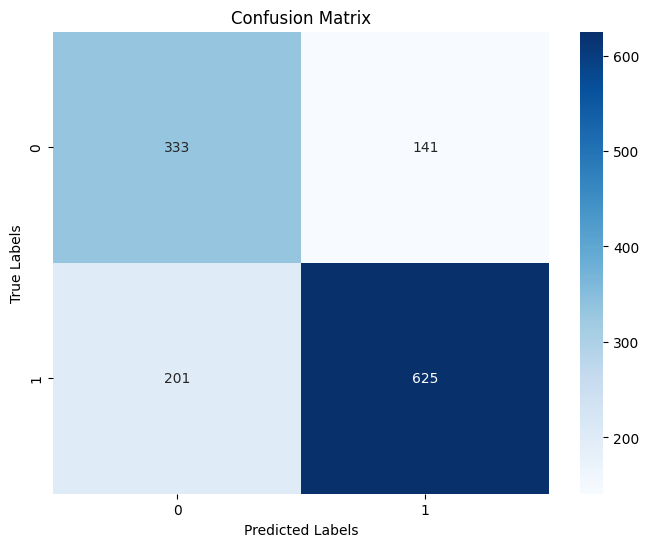

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       474
           1       0.82      0.76      0.79       826

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.74      0.74      1300




In [23]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(x_train, y_train)

    print(models[i])
    train_predictions = models[i].predict(x_train)
    train_accuracy = roc_auc_score(y_train, train_predictions)
    print('Training Accuracy : ', train_accuracy)

    test_predictions = models[i].predict(x_test)
    test_accuracy = roc_auc_score(y_test, test_predictions)
    print('Validation Accuracy : ', test_accuracy)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    print('Confusion Matrix:')
    print(cm)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    #classificaiton report
    print(classification_report(y_test,models[i].predict(x_test)))

    print()


Как видим точность модели равна 0,74 что является средним результатом, а значит модель ещё можно улучшать.